## 3.3 Experiments – 20 marks

### 3.3.1 Design experiments to test the following: The utility of the data that you have generated using your proposed anonymisation scheme (algorithms) for Q2.c.

First, we start with preprocessing measures to ensure we can compare the utility of our data accordingly. 

In [173]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

def interval_to_middle(value):
    if pd.isna(value):
        return np.nan  
    start, end = value.split('-')
    start = int(start)
    end = int(end)
    # Calculate the middle value of the interval
    middle = (start + end) / 2
    return middle

# Apply preprocessing measures to be able to compare our two datasets
orig_df = pd.read_csv("police-shooting.csv")
orig_df = orig_df.drop(['city', 'name', 'longitude', 'latitude', 'is_geocoding_exact', 'id'], axis=1)

orig_df['year'] = pd.to_datetime(orig_df['date']).dt.year
orig_df = orig_df.drop(['date'], axis=1)

anon_df = pd.read_csv("k_anon_police.csv")
anon_df['year'] = anon_df['year_range'].apply(interval_to_middle)
anon_df['age'] = anon_df['age_range'].apply(interval_to_middle)
anon_df = anon_df.drop(['year_range', 'age_range', 'id'], axis=1)

When preprocessing is done, we compare the cardinality of each of the attributes. Comparing the cardinality of each attribute between original and anonymized datasets can be important for understanding the impact of the anonymization process on the data's utility. Cardinality, in this context, refers to the ratio of unique values to the total number of values within a column of a dataset. This measure helps identify how diverse or unique the data in each column is.

In [174]:
cardinalities_orig = {}
cardinalities_anon = {}

for column in orig_df.columns:
    u = orig_df[column].nunique() 
    n = orig_df[column].count()  
    c = u / n  # Cardinality calculation
    cardinalities_orig[column] = c
    
for column in anon_df.columns:
    u = anon_df[column].nunique() 
    n = anon_df[column].count()  
    c = u / n  # Cardinality calculation
    cardinalities_anon[column] = c

    
df_orig_cardinalities = pd.DataFrame(list(cardinalities_orig.items()), columns=['Attribute', 'Original Cardinality'])
df_anon_cardinalities = pd.DataFrame(list(cardinalities_anon.items()), columns=['Attribute', 'Anonymized Cardinality'])
combined_cardinalities = pd.merge(df_orig_cardinalities, df_anon_cardinalities, on='Attribute')
print(combined_cardinalities.to_string(index=False))

              Attribute  Original Cardinality  Anonymized Cardinality
        manner_of_death              0.000250                0.000250
                  armed              0.013628                0.013628
                    age              0.010816                0.000401
                 gender              0.000251                0.000251
                   race              0.000927                0.000927
                  state              0.006384                0.006384
signs_of_mental_illness              0.000250                0.000250
           threat_level              0.000376                0.000376
                   flee              0.000569                0.000569
            body_camera              0.000250                0.000250
                   year              0.001001                0.000376


What does this mean for our datasets?

The output shows the comparison of original and anonymized cardinalities for various attributes in a dataset. Most attributes have retained their cardinality after anonymization, indicating that their diversity or uniqueness level remains unchanged, which is good for data utility while also maintaining privacy. However, the 'age' attribute shows a significant reduction in cardinality in the anonymized dataset compared to the original. This suggests that the anonymization process has greatly reduced the diversity of ages, possibly to enhance privacy by making it harder to identify individuals based on age, but at the cost of potentially reducing the usefulness of the 'age' attribute for detailed analysis. Other attributes like 'manner_of_death', 'gender', 'race', and 'body_camera' maintain their cardinality.

Then, we proceed by displaying the minimum value, mean value, 25th percentile value, 75th percentile value, standard derivation and the total value count for the numerical values in both of the datasets.

In [175]:
stats_original = orig_df.describe().transpose()
stats_anonymized = anon_df.describe().transpose()

stats_original.columns = ['orig_' + col for col in stats_original.columns]
stats_anonymized.columns = ['anon_' + col for col in stats_anonymized.columns]

combined_stats = pd.merge(stats_original, stats_anonymized, left_index=True, right_index=True)

print(combined_stats)

      orig_count    orig_mean   orig_std  orig_min  orig_25%  orig_50%  \
age       7489.0    37.215917  12.986545       2.0      27.0      35.0   
year      7989.0  2018.536863   2.290178    2015.0    2017.0    2019.0   

      orig_75%  orig_max  anon_count    anon_mean   anon_std  anon_min  \
age       45.0      92.0      7489.0    38.072573  17.868025      15.0   
year    2021.0    2022.0      7989.0  2019.483352   2.556590    2016.5   

      anon_25%  anon_50%  anon_75%  anon_max  
age       15.0      45.5      45.5      80.5  
year    2016.5    2020.0    2023.0    2023.0  


The comparison between original and anonymized data for "age" and "year" reveals significant differences in their statistical distributions.

For "age," :
There is a slight increase in the mean value from 37.22 in the original data to 38.07 in the anonymized data. The standard deviation sees a substantial rise from 12.99 to 17.87, indicating a greater variability in the anonymized age data. Additionally, the minimum age has increased from 2 to 15, and the maximum has decreased from 92 to 80.5, suggesting a narrowing of the age range in the anonymized data. Furthermore, the 25th and 75th percentiles both show a significant shift to 15 and 45.5, respectively, in the anonymized data, which indicates a concentration of values around the median.

For "year,":
The mean year has slightly increased from 2018.54 in the original data to 2019.48 in the anonymized data, indicating a minor shift towards more recent years. The standard deviation also increased from 2.29 to 2.56, showing a slight spread in the year data after anonymization. The range of years has been modestly compressed, with the minimum and maximum values shifting from 2015-2022 in the original data to 2016.5-2023 in the anonymized data. The 25th, 50th, and 75th percentiles in the anonymized data also indicate a shift towards more recent years. These changes suggest that while the anonymization process generally preserves the central tendency of the data, it impacts the variability and range of the "age" data more significantly than the "year" data.

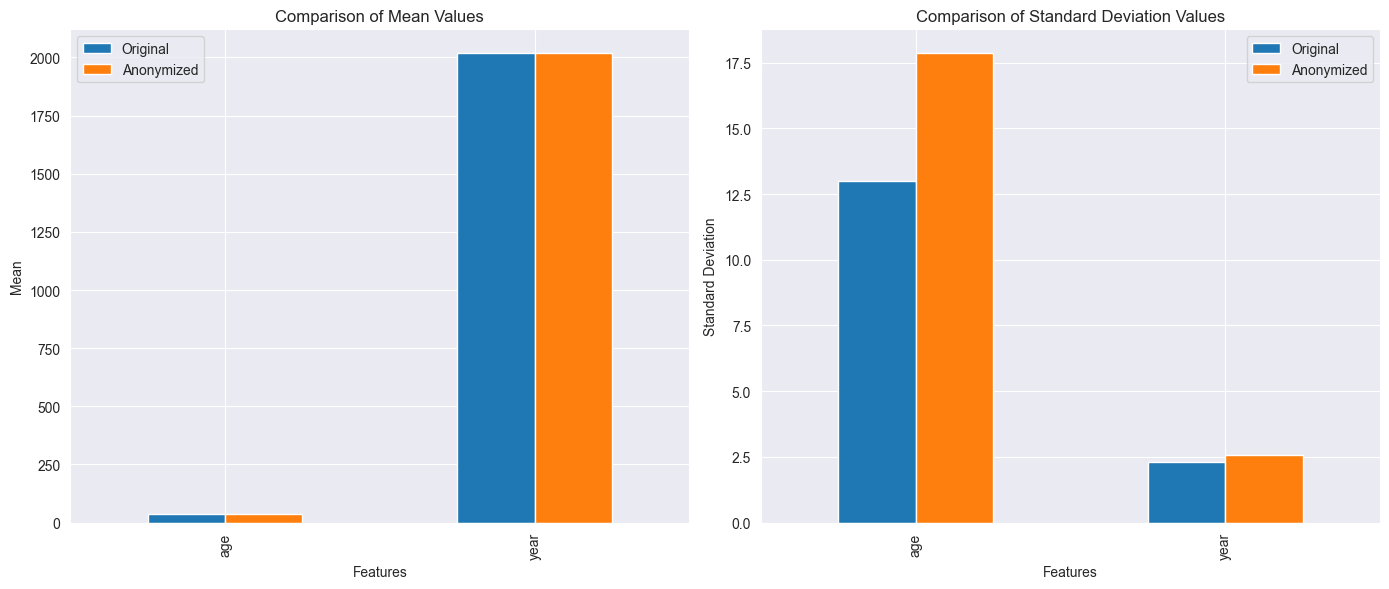

In [176]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

combined_stats[['orig_mean', 'anon_mean']].plot(kind='bar', ax=ax[0])
ax[0].set_title('Comparison of Mean Values')
ax[0].set_ylabel('Mean')
ax[0].set_xlabel('Features')
ax[0].legend(["Original", "Anonymized"])

combined_stats[['orig_std', 'anon_std']].plot(kind='bar', ax=ax[1])
ax[1].set_title('Comparison of Standard Deviation Values')
ax[1].set_ylabel('Standard Deviation')
ax[1].set_xlabel('Features')
ax[1].legend(["Original", "Anonymized"])

plt.tight_layout()
plt.show()

We now progress in comparing if there is a difference in the number of missing values in the two datasets. 

In [177]:
missing_original = orig_df.isnull().sum()
missing_anonymized = anon_df.isnull().sum()

original_missing_percentage = (missing_original / len(orig_df)) * 100
anonymized_missing_percentage = (missing_anonymized / len(anon_df)) * 100

completeness_comparison = pd.DataFrame({
    'original_missing_perc': original_missing_percentage,
    'anonymized_missing_percentage': anonymized_missing_percentage
})

completeness_comparison

,original_missing_perc,anonymized_missing_percentage
age,6.258606,6.258606
armed,2.641132,2.641132
body_camera,0.000000,0.000000
flee,11.978971,11.978971
gender,0.388034,0.388034
manner_of_death,0.000000,0.000000
race,18.976092,18.976092
signs_of_mental_illness,0.000000,0.000000
state,0.000000,0.000000
threat_level,0.000000,0.000000


As we can see, there is no difference in the number of missing values between the two datasets. 

We now proceed with calculating the pearson coefficient in numerical attributes of our two datasets. alculating Pearson correlation scores between corresponding columns in the original and anonymized datasets helps determine the linear relationship retained post-anonymization. High correlation scores indicate that the anonymized data maintains the general trends and relationships observed in the original data, which is essential for ensuring the anonymized data's utility for predictive modeling and analysis. The Pearson correlation coefficient measures the linear correlation between two sets of data, ranging from -1 to 1. A coefficient of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

In [178]:
from scipy.stats import pearsonr
correlations = {}

for column in orig_df.columns:
    if column in anon_df.columns and orig_df[column].dtype in [np.float64, np.int64, np.int32]:
        combined = pd.concat([orig_df[column], anon_df[column]], axis=1, keys=['original', 'anonymized']).dropna()
        correlation = pearsonr(combined['original'], combined['anonymized'])[0]
        correlations[column] = correlation

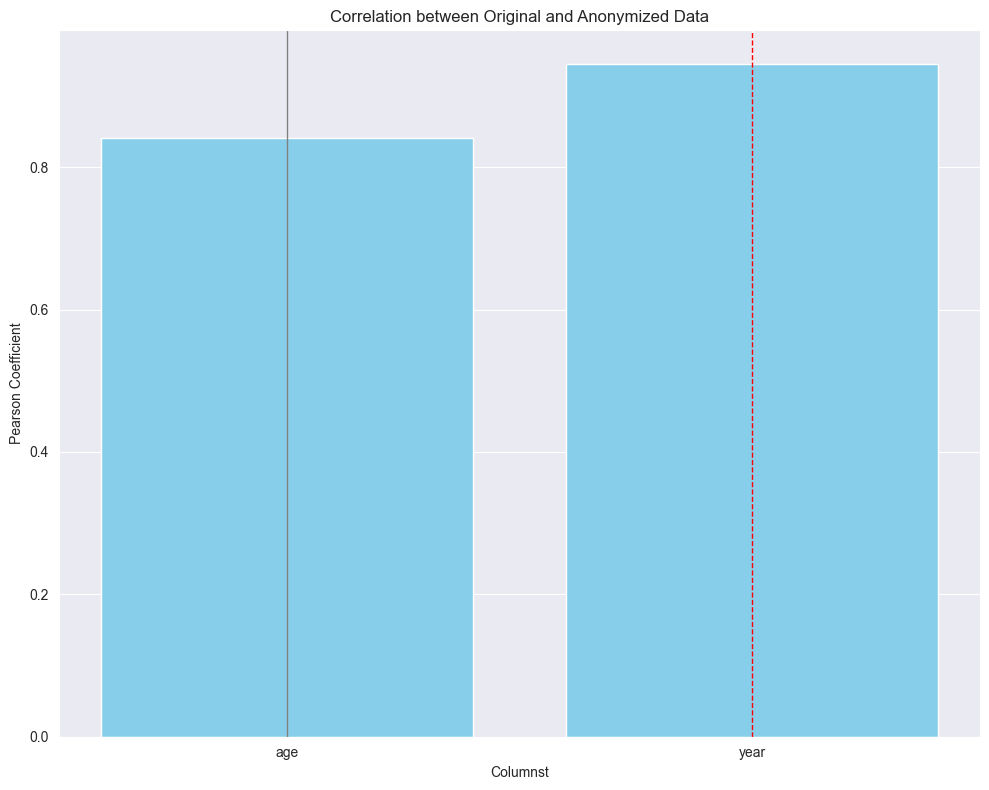

In [179]:
columns = list(correlations.keys())
correlation_values = list(correlations.values())

plt.figure(figsize=(10, 8)) 
plt.bar(columns, correlation_values, color='skyblue')  
plt.xlabel('Columnst')
plt.ylabel('Pearson Coefficient')
plt.title('Correlation between Original and Anonymized Data')
plt.axvline(x=0, color='grey', lw=1)  
plt.axvline(x=1, color='red', linestyle='--', lw=1) 
plt.tight_layout() 

plt.show()

What does this mean for our datasets?

These results suggest a strong positive correlation between the original and anonymized data for both columns, with "year" having a slightly stronger correlation than "age". This indicates that the anonymization process has largely preserved the linear relationship between the original and anonymized values for these two attributes, although the relationship for "age" is slightly weaker compared to "year".

In the following, we calculate the Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) between the two datasets. These metrics quantify the average magnitude of errors between the original and anonymized data values, offering a sense of how much information loss or distortion occurs due to anonymization. MAE provides a straightforward average error magnitude per data point without considering error direction, making it easier to interpret. RMSE gives higher weight to larger errors, thus offering insight into the variance of the errors and potentially highlighting more significant data distortions.

The combination of these metrics offers a comprehensive view of the data anonymization quality. 

In [180]:
def calculate_correlations(data_original, data_anonymized):
    column_correlations = {}
    for column_name in data_original.columns:
        if column_name in data_anonymized.columns and data_original[column_name].dtype in [np.float64, np.int64, np.int32]:
            combined_data = pd.concat([data_original[column_name], data_anonymized[column_name]], axis=1, keys=['data_orig', 'data_anon']).dropna()
            corr_value = pearsonr(combined_data['data_orig'], combined_data['data_anon'])[0]
            column_correlations[column_name] = corr_value
    return column_correlations


def compute_similarity_metrics(dataset_original, dataset_anonymized):
    metrics_results = {}

    correlation_scores = calculate_correlations(dataset_original, dataset_anonymized)
    metrics_results['correlation_scores'] = correlation_scores
    errors_mae = {}
    errors_rmse = {}
    for column_name in dataset_original.columns:
        if column_name in dataset_anonymized.columns and dataset_original[column_name].dtype in [np.float64, np.int64, np.int32]:
            data_orig_col = dataset_original[column_name].dropna()
            data_anon_col = dataset_anonymized.loc[data_orig_col.index, column_name]
            mae_value = np.mean(np.abs(data_orig_col - data_anon_col))
            rmse_value = np.sqrt(np.mean((data_orig_col - data_anon_col) ** 2))
            errors_mae[column_name] = mae_value
            errors_rmse[column_name] = rmse_value
    print({'Errors_MAE': errors_mae, 'Errors_RMSE': errors_rmse})
    return {'Errors_MAE': errors_mae, 'Errors_RMSE': errors_rmse}

{'Errors_MAE': {'age': 8.796968887701963, 'year': 1.0692827638002254}, 'Errors_RMSE': {'age': 9.921307075683055, 'year': 1.2703839295964008}}


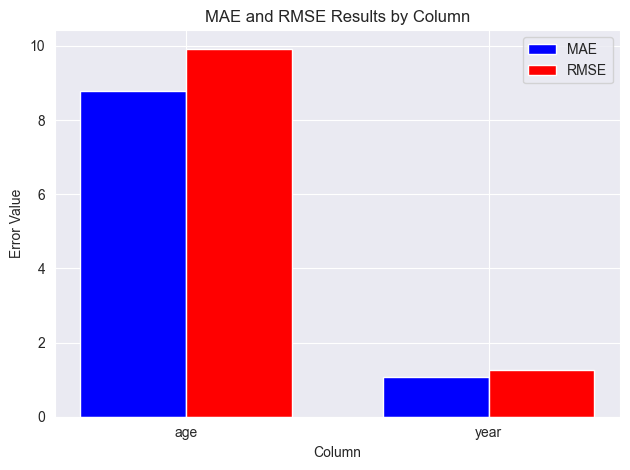

In [181]:
similarity_results = compute_similarity_metrics(orig_df, anon_df)
mae_results = similarity_results['Errors_MAE']
rmse_results = similarity_results['Errors_RMSE']

columns = list(mae_results.keys())  # Column names
mae_values = list(mae_results.values())  # MAE values
rmse_values = list(rmse_results.values())  # RMSE values

fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(columns))
ax.bar(index, mae_values, bar_width, label='MAE', color='blue')
ax.bar([p + bar_width for p in index], rmse_values, bar_width, label='RMSE', color='red')
ax.set_xlabel('Column')
ax.set_ylabel('Error Value')
ax.set_title('MAE and RMSE Results by Column')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(columns)
ax.legend()
plt.tight_layout()
plt.show()

What does this mean for our datasets?

The results indicate the magnitude of errors between the original and anonymized data for two columns: "age" and "year."

For "age", the Mean Absolute Error (MAE) is approximately 8.80, and the Root Mean Squared Error (RMSE) is around 9.92. These values suggest a moderate level of error or deviation in the anonymized "age" data from the original values, with the RMSE being higher, indicating the presence of some larger errors in the data.

For "year", the MAE is about 1.07, and the RMSE is approximately 1.27. These lower values indicate a smaller level of error in the anonymized "year" data, suggesting that the anonymization process preserved the "year" data more closely compared to the "age" data.

We now apply a machine learning approach to further analyze the relative utility of the data with the original dataset:

We try to measure the impact of anonymization on predictive accuracy. The choice of a RandomForestRegressor model, combined with preprocessing steps like imputation and one-hot encoding within a pipeline, ensures an evaluation by handling categorical and numerical data types and missing values effectively. This approach allows us to compare the datasets by assessing the Mean Squared Error (MSE) and R-squared (R^2) values, thereby quantifying the potential loss of information due to anonymization.

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def prepare_data(df, target_variable):
    df = df.dropna(subset=[target_variable])
    
    y = df[target_variable]
    X = df.drop(target_variable, axis=1)
    
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns
    
    numerical_transformer = SimpleImputer(strategy='mean') 
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), 
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    return pipeline, X, y

def evaluate_model(data, target_variable):
    pipeline, X, y = prepare_data(data, target_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

target_variable = 'age' 

# Evaluate the model for both datasets
orig_mse, orig_r2 = evaluate_model(orig_df, target_variable)
anon_mse, anon_r2 = evaluate_model(anon_df, target_variable)

print(f"Original Data - MSE: {orig_mse}, R^2: {orig_r2}")
print(f"Anon Data - MSE: {anon_mse}, R^2: {anon_r2}")

Original Data - MSE: 178.9628592743075, R^2: -0.040941914072977204
Anon Data - MSE: 353.47617744408063, R^2: -0.1116319774568244


What does this mean for our datasets?

Mean Squared Error (MSE): 
MSE measures the average squared difference between the estimated values and the actual value. A lower MSE indicates a better fit of the model to the data. The closer the MSE is to zero, the better the model's predictions are.
In our case: 
The original data has an MSE of 178.96, and the anonymized data has a higher MSE of 353.48. This means that the model's predictions were more accurate with the original data than with the anonymized data.

R-Square Score: 
The coefficient of determination, indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. R^2 scores range from -∞ to 1, where a score of 1 means the model perfectly predicts the target variable, and a score of 0 means the model is no better than a model that simply predicts the mean of the target variable. Negative values indicate that the model is worse than this simple model.
In our case: 
The R^2 score for the original data is -0.0409, and for the anonymized data, it's -0.1116. Both scores are negative, suggesting that in both cases, the model performs worse than a simple model that always predicts the mean age.

Conclusion:
The anonymized data is less useful for this specific machine learning task than the original data, as evidenced by the worse performance metrics (higher MSE and more negative R^2 score). This does not mean the anonymized data is entirely useless, but rather that its utility is diminished, and depending on the degree of anonymization and the sensitivity of the task to data alterations, it might not be the best choice for models requiring high precision or accuracy.

### 3.3.2 Design experiments to test the following: Analyse the new (anonymized) dataset for risks of de-anonymization.
We are using the same Algorithm proposed in Task 3.2. Then we look at the identified z_scores of the anonymized dataset and try to match real world data with the anonymized data.  

In [183]:
import pandas as pd
from scipy import stats
import numpy as np
import prince
import warnings
import altair as alt
pd.options.mode.chained_assignment = None  # default='warn'

alt.data_transformers.enable("vegafusion")

df = pd.read_csv('k_anon_police.csv')
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

mca = prince.MCA(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
# Fit FAMD on the dataset
mca = mca.fit(df)

df_transformed = mca.transform(df)
z_scores = np.abs(stats.zscore(df_transformed))

# Identifying outliers (any data point with a z-score > 3 in any dimension)
outliers_boolean_array = (z_scores > 3).any(axis=1)

# Selecting rows and corresponding z-scores for outliers
outlier_rows = df[outliers_boolean_array]
outlier_z_scores = z_scores[outliers_boolean_array]

# Calculate the maximum z-score for each outlier to add as a new column
max_z_scores_per_outlier = np.max(outlier_z_scores, axis=1)

# Add the max z-scores to the outlier DataFrame
outlier_rows['z_scores'] = max_z_scores_per_outlier

# Save the DataFrame with the new 'z_scores' column to CSV
outlier_rows = outlier_rows.sort_values(by="z_scores", ascending=False)
outlier_rows.to_csv('police_shooting_outliers.csv', index=False)

mca.plot(
    df,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

alt.LayerChart(...)

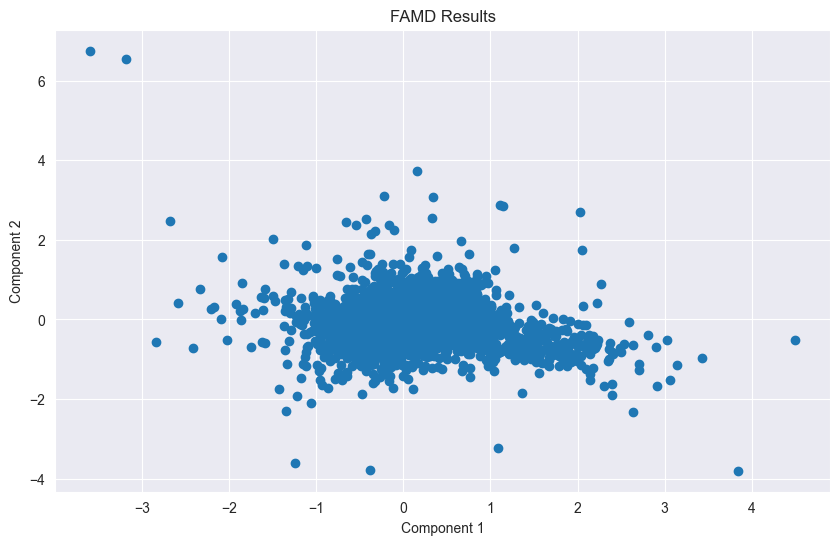

In [184]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.scatter(df_transformed[0], df_transformed[1]) 

plt.title('FAMD Results')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)

plt.show() 

As we can see, there are a lot of outliers still present in the data. For example, looking at the first entry with the highgest z-scores, we can already de-anonymize the first entry: 

In [185]:
df = pd.read_csv('police_shooting_outliers.csv')
print(df.iloc[:3])

     id manner_of_death              armed gender race state  \
0  7942            shot      bow and arrow      M  NaN    OK   
1  7950            shot              stake      M  NaN    DC   
2  8015            shot  incendiary weapon      M  NaN    NC   

   signs_of_mental_illness  threat_level         flee  body_camera age_range  \
0                    False  undetermined          NaN        False       NaN   
1                    False         other  Not fleeing        False       NaN   
2                    False        attack  Not fleeing         True       NaN   

  year_range   z_scores  
0  2022-2024  18.887980  
1  2022-2024  15.391366  
2  2022-2024  14.891725  


By extensive google searching, we can find out that the with bow and arrow armed man killed name is Guy Walker. This actually matches the data in police_shooting.csv. By researching, we find out that the man was actually killed a day earlier than reported in our police shooting dataset. By trying googling the other present data of the entries 2-5 with the top 5 z-scores, we were not able to replicate the result from the first entry. We cant match real names to the anonymized data. With really intense web searching, this might still be possible, although we didn't manage to do so while trying various different search prompts. 

### 3.3.3 Design experiments to test the following: Propose a method of assessing the risk of disclosure (de-anonymisation) and use this metric to evaluate your anonymised datasets (from Assignments #1, and #2-3), the anonymised dataset received from your colleague, and your version of the anonymised dataset that you obtained in Q2.c.
